# Algorithmic efficiency

In [ ]:
#PHZ3150 - Spring 2021

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

## Big ‘O’notation: a way to discuss the growth of an algorithm’s runtime as a function of one or more variables of interest, often focused on N, the number of data points or records.


<img src="efficiency1.png" width=550 height=250 />
Source: Statistics, Data Mining and Machine Learning in Astronomy 2014


## also important is how much space (RAM) we need to use for our code

In [ ]:
### FYI, you might hear about the "Big Oh" and "Omega" asymptotic upper and lower bounds that are a 
### means to describe the max (asymptotic!) and min time 

## Number of things can slow your code down:


- Make sure that you avoid a lot of I/O  (see below)

- if possible, consider where code runs; running the code if possible/appropriate at GPUs will help speed it up
    

- Parallelize code (if possible; ideas?)

- Avoid repeating work on subproblems that has already been performed (--> note that if too complex problems recalling result from memory can end up adding more time...)

- Sometimes, the order of performing specific calculations can also affect the speed of your code  (see below)

- Chop up the parameter space and show that some parts can be ignored or approximated during the computation 

- For fitting data (think ML) chose a subset of the points that yield higher leverage or somehow more effectively represent the information in the whole data set

- transform/ decompose complicated functions into simpler ones (simplify your problem -- reduce dimensionality - see below)



## Examples of order of calculations "killing" your runtime:


In [2]:
# nested loops!!

N = 30000
M = 30000
A = np.arange(1, M, 1)
B = np.arange( 1, N, 1)

C = np.zeros( (N, M) )


In [3]:
%%time
for i in range( N -1 ):
    for j in range( M-1 ):
        C[ i, j ] = A[ j ] * B[ i ]

# 38.6 s ± 3.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

KeyboardInterrupt: 

In [ ]:
%%time
for j in range( M -1 ):
    for i in range( N-1 ):
        C[ i, j ] = A[ j ] * B[ i ]
# 40.9 s ± 3.86 s per loop (mean ± std. dev. of 7 runs, 1 loop each

#### sometimes, list comprehension comes to the rescue

In [4]:
%%time
C2 = [ [A[ j ] * B[ i ] for i in range(N-1)] for j in range(M-1)]
# 34.2 s ± 627 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

KeyboardInterrupt: 

In [ ]:
%%time
C2b = [ [A[ j ] * B[ i ] for j in range(M-1)] for i in range(N-1)]
# 29.4 s ± 1.93 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
print ( C2b[0][0:3] )
print ( C[ 0 , 0:3] )

## An example of IO affecting your running time:

In [5]:
%%time
#open file emma read some lines, then read some more...



file_read = open("emma.txt", "r")

lines = file_read.readlines()[2:10]
# do sth....
lines2 = file_read.readlines()[10: 30]
# do sth else....
lines3 = file_read.readlines()[ 40: 100]

# do sth else....
lines4 = file_read.readlines()[ 110: 140]
# do sth else....
lines5 = file_read.readlines()[ 140: ]

file_read.close()

Wall time: 77 ms


In [6]:
%%time
#open file emma read everything in one go...
file_read = open("emma.txt", "r")
lines_all = file_read.read()
file_read.close()

Wall time: 7.06 ms


### comparable to when you deal with data:

In [ ]:
location = "/Users/theodora_karalidi/Desktop/courses_UCF/PHZ3150/fall_2019/demos/"

In [ ]:
mm = np.zeros( 40 ) 

In [ ]:
%%time
with open(location+'com_2.dat') as f:
    for i, line in enumerate(f):
        if i <= 10:
            mm[ i ] = line.split()[3]
            
with open(location+'com_2.dat') as f:
    for i, line in enumerate(f):
        if (i > 10) & (i <= 20) :
            mm[ i ] = line.split()[3]
            
with open(location+'com_2.dat') as f:
    for i, line in enumerate(f):
        if (i > 20) & (i <= 30) :
            mm[ i ] = line.split()[3]
            
with open(location+'com_2.dat') as f:
    for i, line in enumerate(f):
        if (i > 30) & (i < 40) :
            mm[ i ] = line.split()[3]
# CPU times: user 710 µs, sys: 961 µs, total: 1.67 ms
# Wall time: 912 µs

In [ ]:
%%time

with open(location+'com_2.dat') as f:
    a  = f.read()
    mm = a.split()[ 3]
# CPU times: user 325 µs, sys: 341 µs, total: 666 µs
# Wall time: 376 µs    

### “dimensionality is a curse” the more complicated your model is the harder it is to find a solution; the more data you need to constrain the model

### think of wanting to buy a car with n =1, 2, 3, 4….requirements (color, interior, stick or automatic, cylinders….) The probability to find your dream car is $r^n$ ($r << 1$) .... the more requirements you have the more cars you need to go through to find your ideal car/ the less chances you have to find it.


### Reducing your dimensionality: try to find the fewer amount of parameters you need to fit to model your data.


### There are a number of ways to reduce your dimensionality. Most common one is PCA (Principal Component Analysis):
- Orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated varaibles: the principal components
- e.g., https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

<img src="pca_example.png" width=350 height=350 />
Image source: Nicoguaro - Own work, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=46871195


### PCA can be helpful for making your highly complex problems tracktable, like, e.g.:

- <img src="pca_1.png" width=350 height=350 />

- <img src="pca_2.png" width=350 height=350 />

### Some examples of where to use PCA can be found here: 
 https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


### Simplifying the problem at hand: often you will need to write code that models advanced problems (integrations, differentiations,….). How do you simplify those?  
- summation instead of integration; 
- $\frac{\Delta y}{\Delta x}$ instead of $\frac{dy}{dx}$; 
- Taylor expansions for more complex functions ....


### We discussed about bullets 1 and 2 last week. Let's see them in action, and we 'll see some expansions as well:

#### Just for a recap, examples for 1, 2 and a Taylor expansion in practice: 

### 1. Assume sphere with radius R = 1,000 m and density $\rho (r) = \rho_0 (1 - \alpha \frac{r}{R}) $, where $\rho_0, \alpha$ are constants. What is the total mass of the sphere if you know that: $M_{tot} = \int_0^{2\pi} \int_0^{\pi} \int_0^R \rho(r) r^2 \sin \phi dr d\phi d\theta $ . 

### You can assume $R$ = 8.913e7 m , $\alpha = 1.13$ and $\rho_0$ = 5320 kg/m3

In [ ]:
R0 = 8.9137e7
alpha = 0.13
rho0 = 5320.

In [ ]:
# integration == summation over small deltas :) 

# let's make arrays for r , theta and phi:

## try it at a lower res: faster/less accurate though

r = 
theta =
phi = 

In [ ]:
mass_tot = 0 



In [ ]:
#print( mass_tot )

In [ ]:
# error is of the order of 1%

### Other approximation you already used:  u = $\frac{dx}{dt}$

In [ ]:
t = np.linspace( 1, 20 )
x = np.arange( 1, 20, 1. ) * 4.2


u = np.zeros( 20 )

for i in range( 1, 19 ):
    u[ i-1 ] = (x[ i ] - x[ i - 1]) / (t[ i ] - t[ i - 1])

In [ ]:
print( u )

### 2. A mass of 0.2kg is hanging from the end of a spring with a constant k=3.5 N/m. You let the mass go, and the mass-spring system starts oscillating.  Assume that x0 = 0 [m], u0 = 0 [m/s]. Remember that g = 9.8 [m/s2], and that the force applied on the mass by the gravity-spring system is F = −mg - kx . 

### Your goal: Plot the oscillation of the mass over time t=np.linespace(0,4,100). 

### To do this, create a function oscillation(x0,t0,u0,k,m,g,t) that takes as input the initial position x0 of the object at time t0, its initial speed u0, the parameters k, m and g and the time at which you want to calculate the location of the mass t, and returns the corresponding location of the object x. 

### Tip 1: remember that F=m * a=m $\frac{d^2x}{d^2t}$.  
### Tip 2: to make the problem more tractable you can split the second order derivative into two first order differences ( $\frac{\Delta x}{\Delta t}$  and $\frac{\Delta u}{\Delta t}$ ).



In [ ]:
#def function:
def spring(x0,t0,u0,k,m,g,t):
    time = np.linspace(t0,t+t0,100)
    x = np.empty(len(time))
    x[0] = x0
    u = u0
    for i in range(1,len(time)):
        x[i] = x[i-1] + u * (time[i] - time[i-1])
        

In [ ]:
## set up problem constants:

xo = 0. # initial position of spring (not the equilibrium position; just random␣,→position)
vo = 0. # initial velocity
tau = 3. # total time of simulation
k = 3.5 # spring constant , in N/m
m = 0.2 # mass , in kg
g = 9.8 # g , in m/ s 2

In [ ]:
#plot:

### Examples of Taylor expansion:

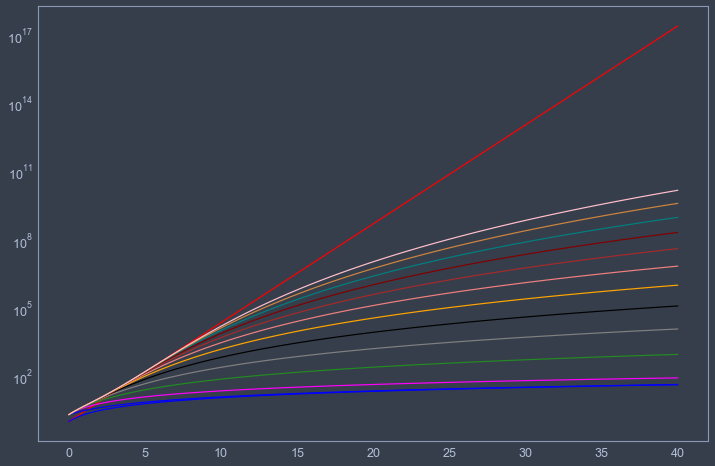

In [7]:
x = np.linspace(0,40,120)

#let's try exp(x) = 1 + x +x^2/2! + x^3 /3! + x^4 /4!+....
y = np.exp( x )

#plot x,y and then make a for loop that overplots the Taylor expansions at different steps:

plt.figure( figsize = (12, 8 ) )
#make the plot in log y axis:
plt.semilogy( x, y, color='red')

#define a set of colors:
colors= ['blue', 'magenta', 'forestgreen', 'gray', 'black', 'orange', 'lightcoral', 'brown', 'maroon', 'teal',
        'peru', 'pink', 'firebrick']

#plot your Taylor expansion for the first 12 terms (use the math factorial)
z =  1+ x

plt.semilogy( x, z,color=colors[0])

for i in range( 12 ):#(1,11):
    z = z+ (x**i /np.math.factorial(i))
    plt.semilogy(x, z , color = colors[i]) 
    

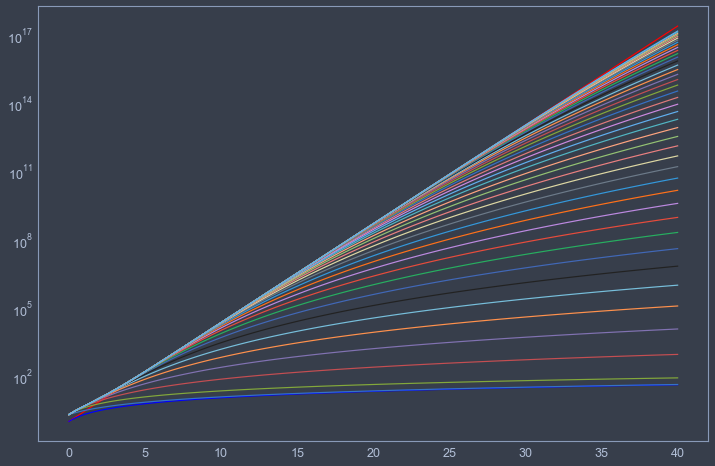

In [8]:
# or if you let it chose the colors on its own:
plt.figure( figsize = (12, 8 ) )
#make the plot in log y axis:
plt.semilogy( x, y, color='red')

z = 1 + x
plt.semilogy( x, z,color=colors[0])

for i in range( 42 ): # around 42 you are getting to the exp(x)
    z = z+ (x**i /np.math.factorial(i))
    plt.semilogy(x, z ) 

### Some examples of Taylor expansion actually used in Physics:
- astrophysics: for small parallax angles  

     -- $\sin\theta \sim \theta $ ; origin: $\sin\theta = \theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - ... $

- very similar to what you have probably done (without realizing?) for solving the motion of a pendulum : 

     -- $\frac{d^2\theta}{dt^2} = - \frac{g}{l} \sin\theta $ --> hard to solve...

#### -- $\frac{d^2\theta}{dt^2} \sim - \frac{g}{l} \theta$ is easier!

### of course, Taylor expansion approximation is an approximation...errors will be introduced but they can be negligible in comparison to the gain you get from speeding up your code..

### 3. Think of 2 stars A and B both at 10pc away from us. They appear to be separated by 0.1 deg. What is their real separation? Use propert trigonometry and then small angle approximation...what is faster?

<img src="../plots/stars_1.png" width=150 height=50 />

In [ ]:
#full blown trigonometry:

In [ ]:
# use small angle approximation


In [ ]:
# get relative error:


### --> negligible relative error, but did save us 14$\mu$sec; note that even if you don't add the extra step of calculating np.tan(theta) and storing it as tantheta, calculation will still be faster for approximation 

### other approximations in Physics :

### Ap1. spring with elastic potential energy U = $\frac{1}{2} k x^2$. What is the relative energy change if we move it by $\delta$x? 


In [ ]:
# approximations:

### from here on I write $\delta$x as dx for easiness: at location x+dx: 

$U_{x+dx} = \frac{1}{2} k (x + dx)^2 $ , so $DU = \frac{1}{2} k (x + dx)^2 - \frac{1}{2} k x^2$

$ \frac{DU}{U}  = \frac{1}{2} k [ ( x + dx)^2 - x^2]  /  ( \frac{1}{2} k x^2 ) $  ==>

$ \frac{DU}{U} =  \frac{  2 x dx + dx ^2  } { x ^2 } $ ==>

$ \frac{DU}{U} = 2 \frac{dx}{ x } + \frac{dx}{x} ^2$ ; 
and $\frac{dx}{x}$ <<1  ==> $\frac{dx}{ x }^2$ ~ 0 ==> $\frac{DU}{U} = 2 \frac{dx}{ x } $


### or using binomial expansion: $(1 + x)^n \sim 1 + nx$ for $x<<1$ so:

$ U + DU = \frac{1}{2} k  ( x + dx)^2   = \frac{1}{2} kx^2 ( 1 + \frac{dx}{x})^2 = U ( 1 + \frac{dx}{x}) ^2 $

and $dx << x$ ==> $( 1 + \frac{dx}{x}) ^2 \sim ( 1 + 2 \frac{dx}{x})$   so that :

$ U + DU = U ( 1 + 2 \frac{dx}{x} ) = U + 2 U \frac{dx}{x}$ ==>


$ \frac{dU}{U} = 2 \frac{dx}{x}$

### Ap2. you have point charge Q at distance r1 from charge -Q. What is the potential at distance r2 from Q, where $\overrightarrow{r2}$ is  perpendicular to $\overrightarrow{r1}$ ?

$V = \frac{kQ}{r1} - \frac{kQ}{\sqrt{ r1^2+r2^2} }  = \frac{kQ}{r1} * ( 1 - (1 + \frac{r2^2}{ r1^2 })^ (-0.5 ) )$ ==>

### using 

$(1+\frac{a}{b})^{-0.5} = 1 -0.5 \frac{a}{b}$ for $a<<b$

$ V = \frac{kQ}{r1} * ( 1 - ( 1 - \frac{1}{2} \frac{r2^2}{r1^2}) ) = kQ \frac{r2^2}{2r1^3}$ 

### a very basic multiprocessing example:
https://docs.python.org/3/library/multiprocessing.html


In [ ]:
def my_sin( n ) :
    """makes a sin function from array x; where x = np.arange( 1, 10000, n)
    Input : n
    Output: sin( 2* pi * x +4 ) """
    
    x = np.linspace( 1, 10000, n ) 
    y = np.sin( 2 * np.pi * x )
    
    return y

In [ ]:
import multiprocessing

num_procs = multiprocessing.cpu_count()
num_procs


In [ ]:
%%time
aa = my_sin( 100000 )
qq = np.mean( aa ) 

In [ ]:
def sin_multiprocessing( n ):
    """Split the sin into num_procs pieces."""
    
    m   = multiprocessing.cpu_count()
    pool = multiprocessing.Pool( m )
    results = pool.map(my_sin,  [int(n/m)]*m) 
    pool.close()
    return np.mean( results )

In [ ]:
%%time
sin_multiprocessing( 100000 )


In [ ]:
%%time
aa = my_sin( 300000000)
qq = np.mean( aa ) 

# CPU times: user 4.58 s, sys: 7.64 s, total: 12.2 s
# Wall time: 14.1 s

In [ ]:
%%time
sin_multiprocessing(300000000)
# CPU times: user 2.87 s, sys: 5.23 s, total: 8.1 s
# Wall time: 12.7 s

### 4. You have the following data:  m1 =  [1, 9, 2, 5, 7, 5]  and  m2 =  [12, 13, 3, 5, 88, -4]  where every element of m1 has a corresponding value in m2 (so 1 and 12 are related, 9 and 13 etc)
### Sort lists m1 and m2 based on the sorting of m1 from min to max.

In [23]:
m1 =  [1, 9, 2, 15, 7, 5] 
m2 =  [12, 13, 3, 5, 88, -4] 
m1sort = []
m2sort = []
while len(m1sort) < 6:
    min1 = m1[0]
    for i in m1:
        if i < min1:
            min1 = i
    m1sort.append(min1)
    m2sort.append(m2[m1.index(min1)])
    m1.remove(min1)
print(m1sort)
print(m2sort)

[1, 2, 5, 7, 9, 15]
[12, 13, 5, 3, 12, 12]
